📊 Random Forest
  Mean Absolute Error: 98,946.80
  R2 Score: 0.9391
----------------------------------------


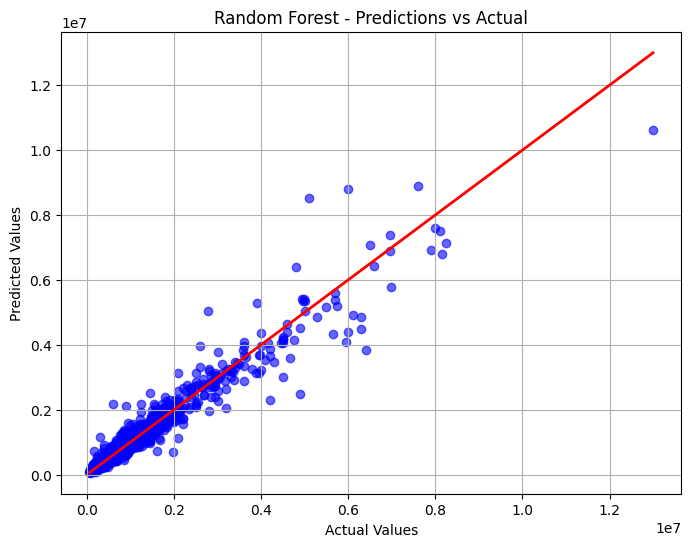

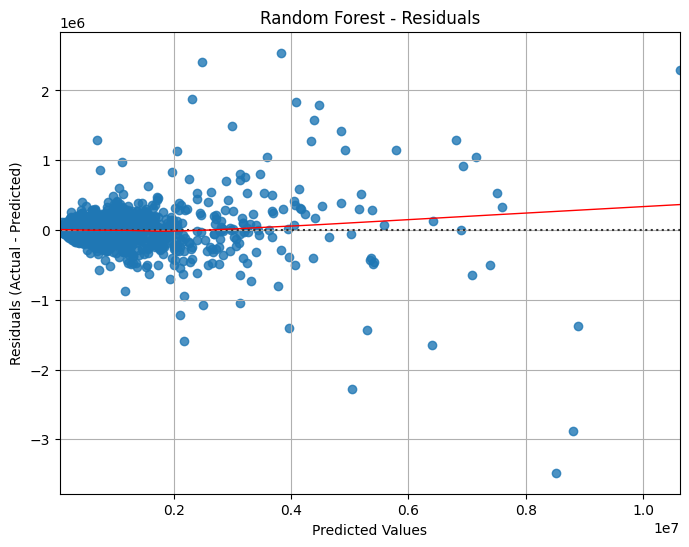

📊 Gradient Boosting
  Mean Absolute Error: 126,653.34
  R2 Score: 0.9223
----------------------------------------


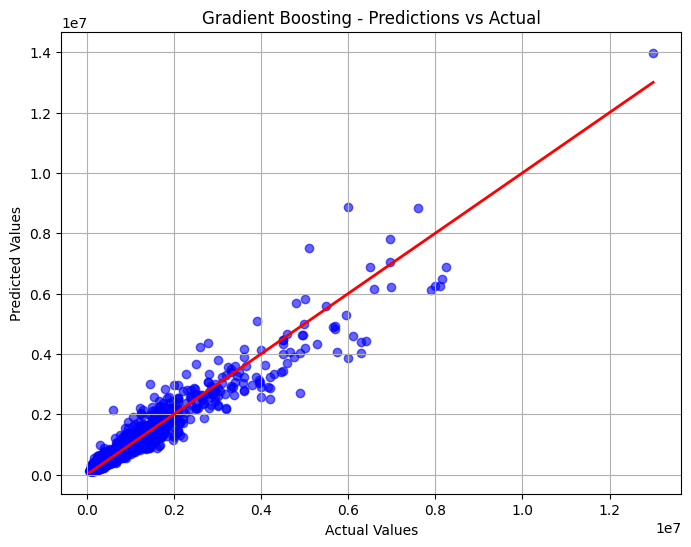

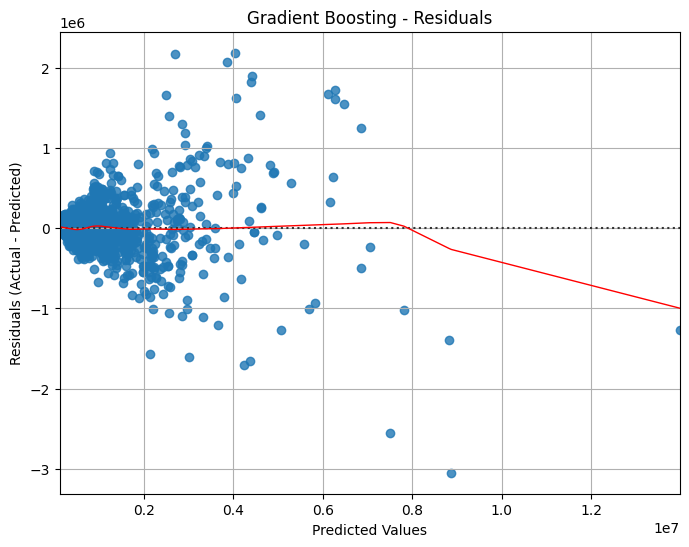

📊 Linear Regression
  Mean Absolute Error: 177,595.01
  R2 Score: 0.7996
----------------------------------------


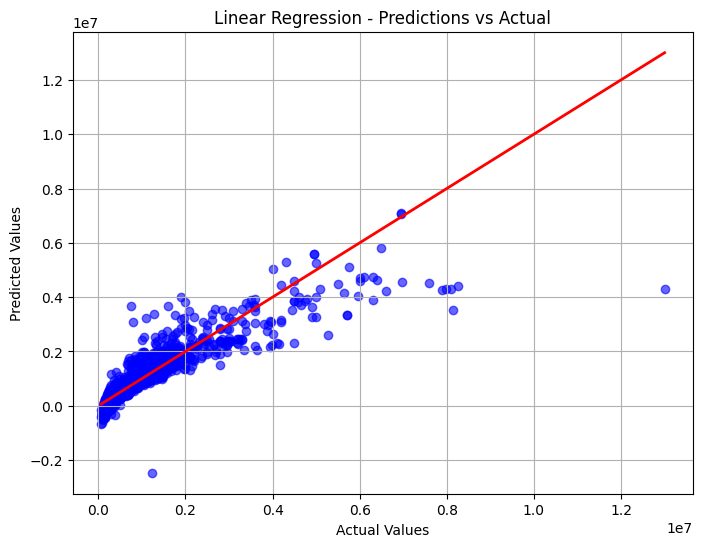

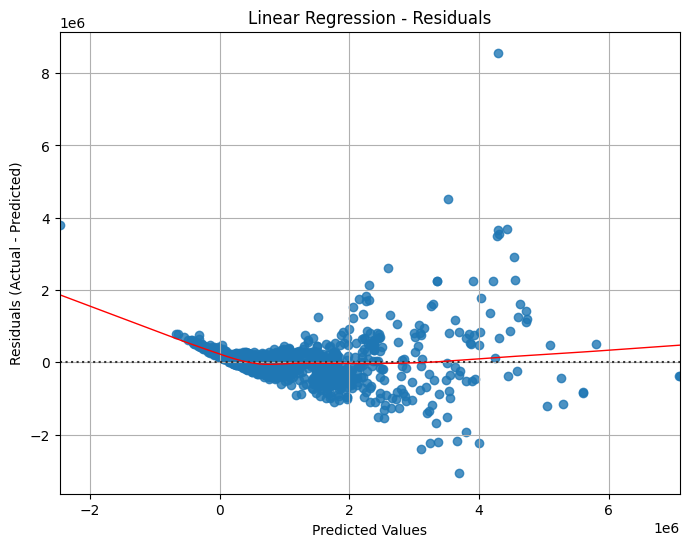

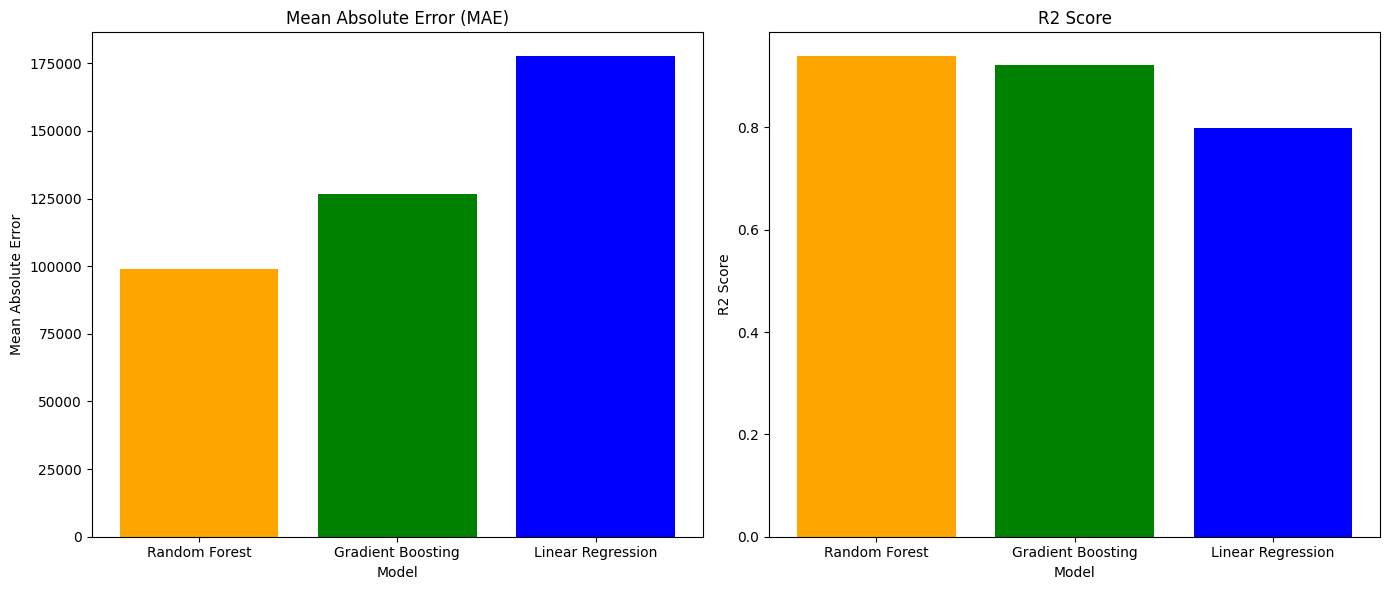

In [13]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Load data
df = pd.read_csv('cardekho_dataset.csv')  # Replace with your actual filename

# 2. Define features and target
X = df.drop('selling_price', axis=1)
y = df['selling_price']

# 3. Identify categorical and numerical columns
categorical_cols = ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']
numerical_cols = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

# 4. Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'Linear Regression': LinearRegression()
}

# Initialize lists to store the metrics for plotting
model_names = []
mae_scores = []
r2_scores = []

# 7. Train and evaluate each model, and collect the metrics for plotting
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Collect the scores
    model_names.append(name)
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

    print(f"📊 {name}")
    print(f"  Mean Absolute Error: {mean_absolute_error(y_test, y_pred):,.2f}")
    print(f"  R2 Score: {r2_score(y_test, y_pred):.4f}")
    print('-' * 40)

    # Plotting the Predictions vs Actual values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
    plt.title(f'{name} - Predictions vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

    # Plotting the residuals (Predicted - Actual)
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
    plt.title(f'{name} - Residuals')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.grid(True)
    plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.bar(model_names, mae_scores, color=['orange', 'green', 'blue'])
ax1.set_title('Mean Absolute Error (MAE)')
ax1.set_ylabel('Mean Absolute Error')
ax1.set_xlabel('Model')

ax2.bar(model_names, r2_scores, color=['orange', 'green', 'blue'])
ax2.set_title('R2 Score')
ax2.set_ylabel('R2 Score')
ax2.set_xlabel('Model')

plt.tight_layout()
plt.show()